In [2]:
from MDbrew.opener import DumpOpener
from MDbrew.tools import Extractor, timeCount
print("Hello")
data = DumpOpener('./test.lammpstrj')
pos1 = Extractor(data=data).get_position_db(type_=1)
pos = Extractor(data=data).get_position_db(type_=2)
ss = data.get_system_size()
ss

Hello
 STEP (Done)			->  1.43 s ✓e
 STEP (Done)			->  0.00 s ✓
 STEP (Done)			->  0.66 s ✓n_db
 STEP (Done)			->  1.32 s ✓e
 STEP (Done)			->  0.00 s ✓
 STEP (Done)			->  0.64 s ✓n_db
 STEP (Done)			->  0.00 s ✓size


[[-12.425478230169531, 12.425478230169531],
 [-12.425478230169531, 12.425478230169531],
 [-12.425478230169531, 12.425478230169531]]

In [3]:
from test_MDbrew.RDF2 import RDF
rdf_11 = RDF(pos1, pos1, ss)
rdf_12 = RDF(pos1, pos, ss)
rdf_22 = RDF(pos, pos, ss)
rdf_11.get_rdf(resolution=10000)
# rdf_12.get_rdf(resolution=10000)
# rdf_22.get_rdf(resolution=10000)

 RDF  (STEP) : 100%|################| 401/401 [00:29<00:00, 13.77it/s]


array([0.        , 0.        , 0.        , ..., 0.9256861 , 0.92353155,
       0.92474418])

In [53]:
cn = rdf_11.get_CN()

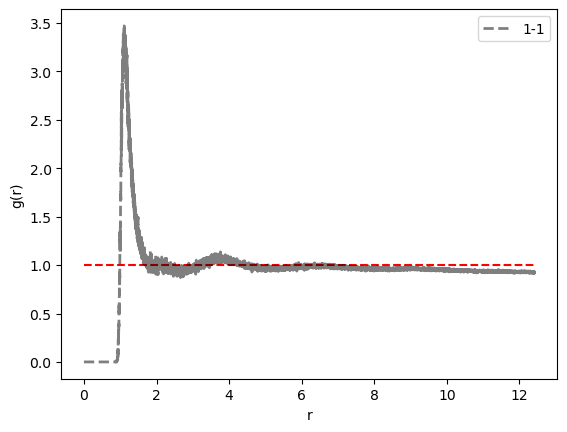

In [4]:
import numpy as np
import matplotlib.pyplot as plt
rdf_11.plot_g_r('k--',label = '1-1', alpha=0.5, linewidth=2)
# rdf_12.plot_g_r(label = '1-2', alpha=1.0)
# rdf_22.plot_g_r(label = '2-2', alpha=1.0)
plt.legend()

In [79]:
x = pos[0]
len(x)
system_size = np.array(data.get_system_size())[:, 1]
resolution = 500
dr = np.min(system_size) / resolution
hist_data = np.zeros(resolution)

 STEP (Done)			->  0.00 s ✓size


In [80]:
for b_line in x:
    b = np.tile(b_line, (len(x), 1))
    diff_position = np.abs(np.subtract(x, b))
    diff_position = np.where(
        diff_position > system_size,
        system_size * 2 - diff_position,
        diff_position,
    )
    r = np.sqrt(np.sum(np.square(diff_position), axis=-1))
    idx_hist = (r / dr).astype(np.int64)
    idx_hist = idx_hist[np.where((idx_hist < resolution) & (0 < idx_hist))]
    hist_data[idx_hist] += 1

In [81]:
r_i = np.arange(1, resolution) * dr
g_r = np.append(0, hist_data[1:] / (r_i **2))
factor = 4.0 * np.pi * 500.0 * dr
denominator = factor * 1 * 500
aaa = g_r * np.prod(system_size) * 8.0 / denominator

In [84]:
diff_position / dr

array([[255.93542084, 262.51812363, 170.05297187],
       [143.27858993, 192.53168255, 194.21703176],
       [329.71527728,  76.17574008,  16.36304424],
       ...,
       [375.49969053, 409.94222804, 382.20013846],
       [426.66929206, 481.76429263, 478.98200695],
       [  0.        ,   0.        ,   0.        ]])